# 1. Understanding the problem space

First, I'm going to load all the datasets and take a quick look at their shapes and main characteristics.

In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  - seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [124]:
data_dir = "/home/pedrotejero/zrive-ds/data/groceries/sampled-datasets"

dataframes = {}
for doc in os.listdir(data_dir):
    if doc.endswith(".parquet"):
        print(f"Processing {doc}...")
        file_name = os.path.splitext(doc)[0]
        dataframes[file_name] = pd.read_parquet(os.path.join(data_dir, doc))
    else:
        print(f"Skipping {doc}, not a parquet file.")

Processing users.parquet...
Processing orders.parquet...
Processing abandoned_carts.parquet...
Processing inventory.parquet...
Processing regulars.parquet...


In [125]:
print(f"Dataframes: {list(dataframes.keys())}")

Dataframes: ['users', 'orders', 'abandoned_carts', 'inventory', 'regulars']


### Users

In [126]:
users = dataframes["users"].copy()
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [127]:
users.shape

(4983, 10)

In [128]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


It is important to note here that most of the values in the "count_" type columns are null. I would say that these variables aim to provide information about the family structure of the people who shop at the store.

### Orders

In [129]:
orders = dataframes["orders"].copy()
orders.head(10)

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."
51,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402..."
53,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254..."
61,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416..."
68,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166..."
70,2224765862020,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,2020-05-06 16:03:35,2020-05-06,1,"[33667174695044, 33667203596420, 3366720589018..."


In [130]:
orders.shape

(8773, 6)

In [131]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[ns]
 3   order_date      8773 non-null   datetime64[ns]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 479.8+ KB


In [132]:
print(f"First order date: {orders['order_date'].min()}")
print(f"Last order date: {orders['order_date'].max()}")

First order date: 2020-04-30 00:00:00
Last order date: 2022-03-14 00:00:00


In [133]:
orders.describe()

,id,created_at,order_date,user_order_seq
count,8.773000e+03,8773,8773,8773.000000
mean,3.684684e+12,2021-08-22 03:54:18.750028288,2021-08-21 12:47:21.262966016,2.445116
min,2.204073e+12,2020-04-30 14:32:19,2020-04-30 00:00:00,1.000000
25%,3.690255e+12,2021-04-25 11:50:37,2021-04-25 00:00:00,1.000000
50%,3.846692e+12,2021-10-11 11:29:44,2021-10-11 00:00:00,1.000000
75%,3.945086e+12,2022-01-03 18:14:23,2022-01-03 00:00:00,3.000000
max,4.026732e+12,2022-03-14 00:24:59,2022-03-14 00:00:00,25.000000
std,4.145437e+11,NaN,NaN,2.707693


"user_order_seq" is likely a cumulative count of the orders placed by each user.<br>
"ordered_items" is a list of the products included in each order.

### Inventory

In [134]:
inventory = dataframes["inventory"].copy()
inventory

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]
...,...,...,...,...,...,...
1728,39539419218052,4.99,5.99,bother,,[household-sundries]
1729,34534187368580,4.69,5.49,tommeetippee,baby-accessories,[feeding-weaning]
1730,33826439594116,15.39,17.15,colief,baby-accessories,[feeding-weaning]
1731,33667214508164,19.49,21.65,enterosgel,medicines-treatments,"[discontinue, first-aid]"


In [135]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


The Inventory table gives us some information about the products being sold. We don't have enough context to understand what the prices in the "compare_at_price" column refer to.

### Regulars

In [136]:
regulars = dataframes["regulars"].copy()
regulars

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11
...,...,...,...
37644,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13
37717,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24
37718,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24
37719,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24


In [137]:
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 565.8+ KB


In [138]:
regulars['variant_id'].nunique()

1843

There are 1,843 unique products in the "Regulars" table, but we only have information about 1,733 products in the Inventory.<br>

This might indicate that Inventory table represents the inventory at a specific point in time rather than the company's entire historical inventory. Therefore, there are products that have been sold whose characteristics we won’t be able to know during this analysis.

In [139]:
regulars['user_id'].nunique()

1448

In [140]:
percentage = (regulars['user_id'].nunique() / users.shape[0]) * 100
print(f"Percentage of users who have purchased any regular product: {percentage:.2f}%")

Percentage of users who have purchased any regular product: 29.06%


### Abandoned Carts

In [141]:
abandoned = dataframes["abandoned_carts"].copy()
abandoned

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"
...,...,...,...,...
70036,22233840976004,2e989bfdec87ef55ea464a529f323ff53dad2a2fc48655...,2022-03-13 14:11:15,"[34284950192260, 39466620911748]"
70041,22233843171460,b2d867b982b14ca517f27c4ced727c8a25c01b96ebbd96...,2022-03-13 14:11:36,"[39536607395972, 39506484461700]"
70043,22233843531908,220aafc0749f209b3f0f7cfe4134a5136815d48f0bbd9a...,2022-03-13 14:11:41,"[39482337624196, 39544243650692]"
70049,22233846218884,a4da55d51052411e54f98e1b90b19843121866abeaea76...,2022-03-13 14:12:09,"[34415989325956, 33667297017988, 3948233762419..."


In [142]:
abandoned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[ns]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 213.2+ KB


Here we find a possible error in the definition of variables, as they have named "variant_id" the list of products that were in abandoned carts, which could cause confusion since "variant_id" in the rest of the tables refers to the ID of a specific product.

If we add the number of orders placed to the number of carts that have been abandoned, we can see that:

In [143]:
total = orders.shape[0] + abandoned.shape[0]

percentage = (abandoned.shape[0] / total) * 100
print(f"Percentage of orders that were abandoned: {percentage:.2f}%")

Percentage of orders that were abandoned: 38.35%


In [144]:
percentage = (abandoned['user_id'].nunique() / users.shape[0]) * 100
print(f"Percentage of users who have abandoned at least one cart: {percentage:.2f}%")

Percentage of users who have abandoned at least one cart: 69.01%


# In-Depth Analysis

I want to analyze abandoned_carts in detail — when they occurred, how many there were, and who abandoned them — Because I think it is especially important for the business to know what could be going wrong.

## 1 - Abandoned Carts Analysis

In [145]:
abandoned['created_at'] = pd.to_datetime(abandoned['created_at']).dt.date
abandoned = abandoned.sort_values(by='created_at')

In [146]:
abandoned

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19,"[33667268083844, 34284950454404, 33973246886020]"
...,...,...,...,...
70018,22233836716164,f1ce3b770bb7cda55332c49881b124cfcd9e63c450bddb...,2022-03-13,"[39587296772228, 39478260695172]"
69946,22230544056452,efb2d9146077359da34e194901d38c0ca9b77d472d7b46...,2022-03-13,"[34284955336836, 34246817022084, 3428495186342..."
70049,22233846218884,a4da55d51052411e54f98e1b90b19843121866abeaea76...,2022-03-13,"[34415989325956, 33667297017988, 3948233762419..."
70023,22233837961348,56f5a49f45f8ede73c1c29d88425be89260a69a7edd07e...,2022-03-13,"[34543001370756, 39459279929476]"


The first abandoned cart was recorded in May 2020, but the next one doesn't appear until a year later. At first glance, we don't know whether no carts were abandoned during that time or if the data simply wasn't recorded.

In [147]:
abandoned = abandoned.explode('variant_id')

In [148]:
abandoned

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826459287684
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826457616516
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33667192127620
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826412331140
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826472558724
...,...,...,...,...
70023,22233837961348,56f5a49f45f8ede73c1c29d88425be89260a69a7edd07e...,2022-03-13,34543001370756
70023,22233837961348,56f5a49f45f8ede73c1c29d88425be89260a69a7edd07e...,2022-03-13,39459279929476
70050,22233846317188,c0e740ecabe7bd19eaed35b5ea9be7bc80c15f32124712...,2022-03-13,34284950519940
70050,22233846317188,c0e740ecabe7bd19eaed35b5ea9be7bc80c15f32124712...,2022-03-13,39459281174660


### 1.1 - Number of products abandoned per day

In [149]:
daily_abandoned = abandoned.groupby('created_at')['variant_id'].count().reset_index(name='n_variants_abandoned').sort_values(by='created_at')
daily_abandoned['created_at'] = pd.to_datetime(daily_abandoned['created_at'])

In [150]:
daily_abandoned

,created_at,n_variants_abandoned
0,2020-05-20,19
1,2021-06-27,9
2,2021-07-18,33
3,2021-07-19,3
4,2021-07-20,2
...,...,...
234,2022-03-09,62
235,2022-03-10,77
236,2022-03-11,94
237,2022-03-12,72


In [151]:
daily_abandoned['n_variants_abandoned'].describe()

count     239.000000
mean      129.158996
std       114.676673
min         2.000000
25%        44.500000
50%       114.000000
75%       174.000000
max      1026.000000
Name: n_variants_abandoned, dtype: float64

In [152]:
print(f"{daily_abandoned['n_variants_abandoned'].mean():.2f} variants were abandoned daily on average.")

129.16 variants were abandoned daily on average.


To better visualize the data in a plot, I’m going to omit the first row of the table, since, as I mentioned earlier, a year passes between the first and second records.

Also, I’m going to fill in the missing days in the dataset with 0s only for better data representation.

In [153]:
df_plot = daily_abandoned.copy()
df_plot = df_plot[1:]
df_plot['created_at'] = pd.to_datetime(df_plot['created_at'])

full_range = pd.date_range(start=df_plot['created_at'].min(), end=df_plot['created_at'].max())
df_full = pd.DataFrame({'created_at': full_range})
df_merged = df_full.merge(df_plot, on='created_at', how='left')
df_merged['n_variants_abandoned'] = df_merged['n_variants_abandoned'].fillna(0).astype(int)
df_plot = df_merged.copy()


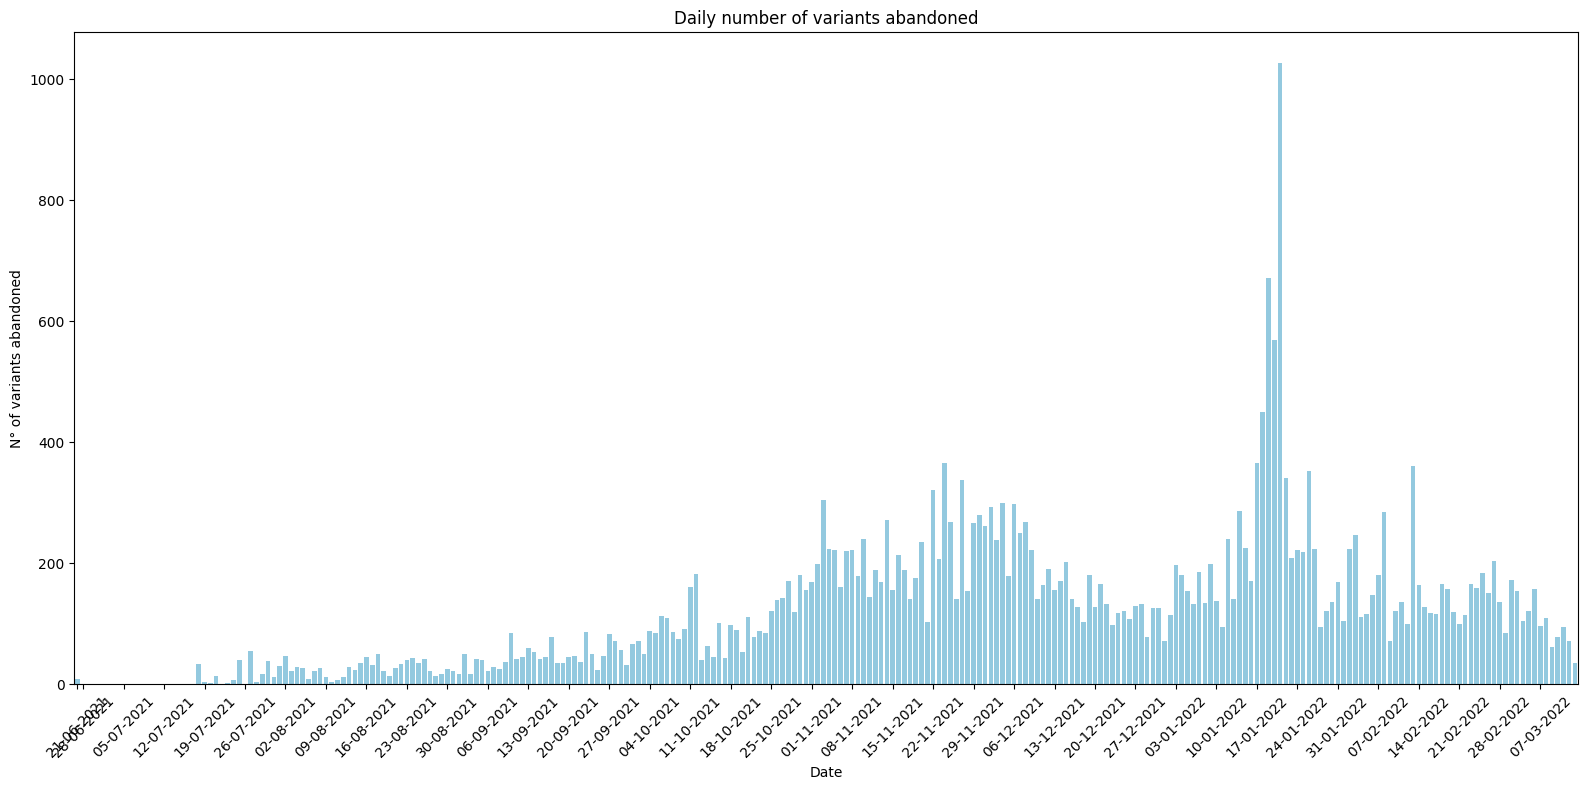

In [154]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df_plot, x='created_at', y='n_variants_abandoned', color='skyblue')

weekly_ticks = df_plot['created_at'].dt.to_period('W').drop_duplicates().dt.start_time
plt.xticks(
    ticks=[df_plot[df_plot['created_at'].dt.to_period('W') == week].index[0] for week in weekly_ticks.dt.to_period('W')],
    labels=weekly_ticks.dt.strftime('%d-%m-%Y'),
    rotation=45,
)

plt.xlabel('Date')
plt.ylabel('N° of variants abandoned')
plt.title('Daily number of variants abandoned')
plt.tight_layout()
plt.show()

### 1.2 - Number of carts abandoned per day

In [155]:
n_carts_daily_abandoned = abandoned.groupby('created_at')['id'].nunique().reset_index(name='n_carts_abandoned').sort_values(by='created_at')
n_carts_daily_abandoned['created_at'] = pd.to_datetime(n_carts_daily_abandoned['created_at'])
n_carts_daily_abandoned

,created_at,n_carts_abandoned
0,2020-05-20,1
1,2021-06-27,1
2,2021-07-18,2
3,2021-07-19,1
4,2021-07-20,1
...,...,...
234,2022-03-09,13
235,2022-03-10,15
236,2022-03-11,13
237,2022-03-12,32


In [156]:
n_carts_daily_abandoned['n_carts_abandoned'].describe()

count    239.000000
mean      22.832636
std       21.407933
min        1.000000
25%        8.000000
50%       22.000000
75%       31.500000
max      247.000000
Name: n_carts_abandoned, dtype: float64

In [157]:
print(f"{n_carts_daily_abandoned['n_carts_abandoned'].mean():.2f} carts were abandoned daily on average.")

22.83 carts were abandoned daily on average.


In [158]:
df_plot = n_carts_daily_abandoned.copy()
df_plot = df_plot[1:]
df_plot['created_at'] = pd.to_datetime(df_plot['created_at'])

full_range = pd.date_range(start=df_plot['created_at'].min(), end=df_plot['created_at'].max())
df_full = pd.DataFrame({'created_at': full_range})
df_merged = df_full.merge(df_plot, on='created_at', how='left')
df_merged['n_carts_abandoned'] = df_merged['n_carts_abandoned'].fillna(0).astype(int)
df_plot = df_merged.copy()

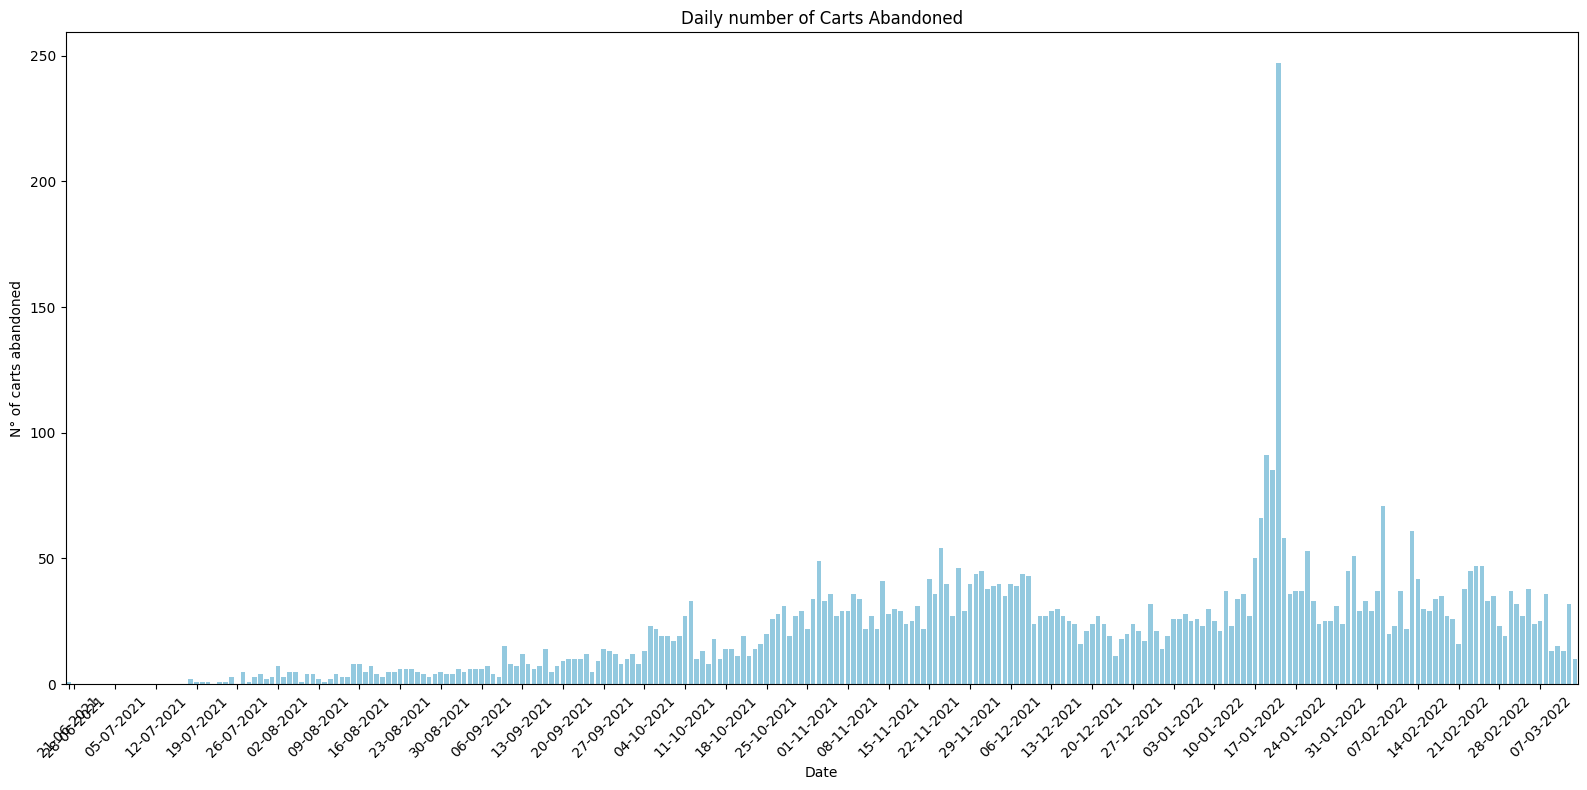

In [159]:

plt.figure(figsize=(16, 8))
sns.barplot(data=df_plot, x='created_at', y='n_carts_abandoned', color='skyblue')

weekly_ticks = df_plot['created_at'].dt.to_period('W').drop_duplicates().dt.start_time
plt.xticks(
    ticks=[df_plot[df_plot['created_at'].dt.to_period('W') == week].index[0] for week in weekly_ticks.dt.to_period('W')],
    labels=weekly_ticks.dt.strftime('%d-%m-%Y'),
    rotation=45,
)

plt.xlabel('Date')
plt.ylabel('N° of carts abandoned')
plt.title('Daily number of Carts Abandoned')
plt.tight_layout()
plt.show()

### 1.3 - Number of products abandoned by day of the week

In [160]:
daily_abandoned['day'] = daily_abandoned['created_at'].dt.day_name()
daily_abandoned['day'] = pd.Categorical(daily_abandoned['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
n_variant_abandoned_by_day = daily_abandoned.groupby('day')['n_variants_abandoned'].sum().reset_index(name='n_abandoned_by_day').sort_values(by='n_abandoned_by_day', ascending=False)

/tmp/ipykernel_5296/271909910.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_variant_abandoned_by_day = daily_abandoned.groupby('day')['n_variants_abandoned'].sum().reset_index(name='n_abandoned_by_day').sort_values(by='n_abandoned_by_day', ascending=False)


In [161]:
n_variant_abandoned_by_day

,day,n_abandoned_by_day
2,Wednesday,4947
4,Friday,4602
0,Monday,4457
1,Tuesday,4435
3,Thursday,4411
6,Sunday,4065
5,Saturday,3952


In [162]:
total_by_day = n_variant_abandoned_by_day['n_abandoned_by_day'].sum()
print(total_by_day == abandoned.shape[0])

True


In [163]:
n_variant_abandoned_by_day['probability_distribution'] = (n_variant_abandoned_by_day['n_abandoned_by_day'] / total_by_day).round(2)
n_variant_abandoned_by_day.sort_values(by='day')

,day,n_abandoned_by_day,probability_distribution
0,Monday,4457,0.14
1,Tuesday,4435,0.14
2,Wednesday,4947,0.16
3,Thursday,4411,0.14
4,Friday,4602,0.15
5,Saturday,3952,0.13
6,Sunday,4065,0.13


There are slightly more products abandoned on weekdays than on weekends, but it’s not particularly significant since the data is fairly evenly distributed across each day of the week.

### 1.4 - Number of carts abandoned by day of the week

In [164]:
n_carts_daily_abandoned['day'] = n_carts_daily_abandoned['created_at'].dt.day_name()
n_carts_daily_abandoned['day'] = pd.Categorical(n_carts_daily_abandoned['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
n_carts_abandoned_by_day = n_carts_daily_abandoned.groupby('day')['n_carts_abandoned'].sum().reset_index(name='n_abandoned_by_day').sort_values(by='n_abandoned_by_day', ascending=False)
n_carts_abandoned_by_day

/tmp/ipykernel_5296/736587845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_carts_abandoned_by_day = n_carts_daily_abandoned.groupby('day')['n_carts_abandoned'].sum().reset_index(name='n_abandoned_by_day').sort_values(by='n_abandoned_by_day', ascending=False)


,day,n_abandoned_by_day
4,Friday,882
2,Wednesday,851
1,Tuesday,824
3,Thursday,781
0,Monday,734
5,Saturday,698
6,Sunday,687


In [165]:
print(n_carts_abandoned_by_day['n_abandoned_by_day'].sum() == abandoned['id'].nunique())

True


In [166]:
n_carts_abandoned_by_day['probability_distribution'] = (n_carts_abandoned_by_day['n_abandoned_by_day'] / abandoned['id'].nunique()).round(2)
n_carts_abandoned_by_day.sort_values(by='day')

,day,n_abandoned_by_day,probability_distribution
0,Monday,734,0.13
1,Tuesday,824,0.15
2,Wednesday,851,0.16
3,Thursday,781,0.14
4,Friday,882,0.16
5,Saturday,698,0.13
6,Sunday,687,0.13


It seems that both the number of abandoned carts per day of the week and the number of abandoned products per day of the week follow a very similar probability distribution.

### 1.5 Number of products per abandoned cart

In [167]:
variants_per_cart = abandoned.groupby('id')['variant_id'].count().reset_index(name='n_variants_per_cart').sort_values(by='n_variants_per_cart')
variants_per_cart['n_variants_per_cart'].describe()

count    5457.000000
mean        5.656771
std         4.720567
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        42.000000
Name: n_variants_per_cart, dtype: float64

<Figure size 1000x600 with 0 Axes>

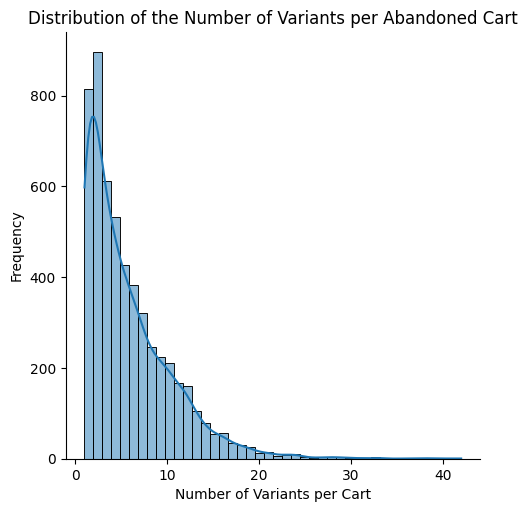

In [168]:
plt.figure(figsize=(10, 6))
sns.displot(variants_per_cart['n_variants_per_cart'], bins=variants_per_cart['n_variants_per_cart'].max(), kde=True)
plt.title('Distribution of the Number of Variants per Abandoned Cart')
plt.xlabel('Number of Variants per Cart')
plt.ylabel('Frequency')

plt.show()

### 1.6 - Which products are the most abandoned ?

Let’s focus on the variants that appear in the highest number of different abandoned carts.

In [169]:
df_products = abandoned.copy()
df_products

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826459287684
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826457616516
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33667192127620
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826412331140
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20,33826472558724
...,...,...,...,...
70023,22233837961348,56f5a49f45f8ede73c1c29d88425be89260a69a7edd07e...,2022-03-13,34543001370756
70023,22233837961348,56f5a49f45f8ede73c1c29d88425be89260a69a7edd07e...,2022-03-13,39459279929476
70050,22233846317188,c0e740ecabe7bd19eaed35b5ea9be7bc80c15f32124712...,2022-03-13,34284950519940
70050,22233846317188,c0e740ecabe7bd19eaed35b5ea9be7bc80c15f32124712...,2022-03-13,39459281174660


In [170]:
df_products1 = df_products.groupby('variant_id')['id'].count().reset_index(name="cart_presence").sort_values(by="cart_presence",ascending=False)
df_products1

,variant_id,cart_presence
307,34081589887108,608
417,34284951863428,478
400,34284950356100,409
335,34137590366340,395
395,34284949766276,382
...,...,...
1268,39561026437252,1
599,34519123951748,1
910,39367712833668,1
912,39368665235588,1


In [171]:
df_products1.describe()

,variant_id,cart_presence
count,1.522000e+03,1522.000000
mean,3.697260e+13,20.281866
std,2.701253e+12,41.729697
min,3.361529e+13,1.000000
25%,3.427657e+13,4.000000
50%,3.928336e+13,9.000000
75%,3.947826e+13,20.000000
max,4.015515e+13,608.000000


In [175]:
df_products2 = df_products1.merge(inventory, on='variant_id', how='left')
df_products2 = df_products2.sort_values(by='cart_presence', ascending=False)
df_products2.head(20)

,variant_id,cart_presence,price,compare_at_price,vendor,product_type,tags
0,34081589887108,608,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
1,34284951863428,478,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
2,34284950356100,409,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]"
3,34137590366340,395,NaN,NaN,NaN,NaN,NaN
4,34284949766276,382,8.49,9.00,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls]
5,34284950519940,307,9.99,12.00,fairy,dishwashing,[dishwasher-tablets]
6,34284950454404,306,3.99,7.50,lenor,fabric-softener-freshener,[fabric-softener-freshener]
7,39459279929476,305,2.99,3.90,colgate,dental,[toothpaste]
8,39284117930116,298,NaN,NaN,NaN,NaN,NaN
9,34037939372164,290,4.99,5.25,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls]


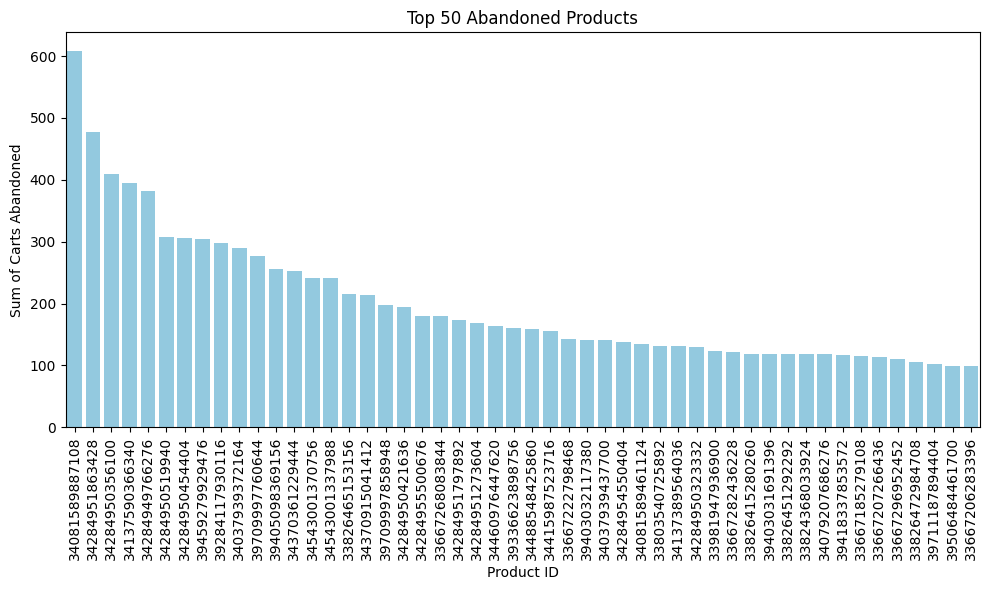

In [185]:
df_plot = df_products2[:50]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='variant_id', y='cart_presence', color='skyblue',order=df_plot['variant_id'])
plt.xticks(rotation=90)
plt.title('Top 50 Abandoned Products')
plt.xlabel('Product ID')
plt.ylabel('Sum of Carts Abandoned')
plt.tight_layout()
plt.show()

### 1.7 - Which customers have abandoned the highest numer of carts?

In [186]:
df_clients = abandoned.copy()
df_clients = df_clients.groupby('user_id')['id'].count().reset_index(name="carts_abandoned_by_user").sort_values(by="carts_abandoned_by_user",ascending=False)
df_clients

,user_id,carts_abandoned_by_user
399,1dacfd2a360677052d8605f843ae410dd23b0ddb7f506c...,114
2065,99fee4584e3a5c37b8dd94c76744c9b41beb36594561f2...,109
1673,7c791fbdcfdb4518615cc4b6fa3302f2f7cae7af60d839...,90
2166,a124c8bb0453ea0957405b7a08a7fd377247bac054a097...,76
3226,efcfbac0bf4c50dfa1cd933c705b7048351856c53880a0...,71
...,...,...
2773,cd76adacf20ccc000f7c4b22e7b609452a0db76ff529c9...,1
351,1a94691894198f64bef3c6bb405bfa13eb855f2554169d...,1
2373,b15b6d6442d87ade819da9a756d45d067f9ad776426cf0...,1
2044,97fcd6bc2ff5f0d6a1ede5a4ad474bc6bf279c637e81e2...,1


/tmp/ipykernel_5296/4246596635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['user_id'] = df_plot['user_id'].astype(str).str.slice(0, 10)


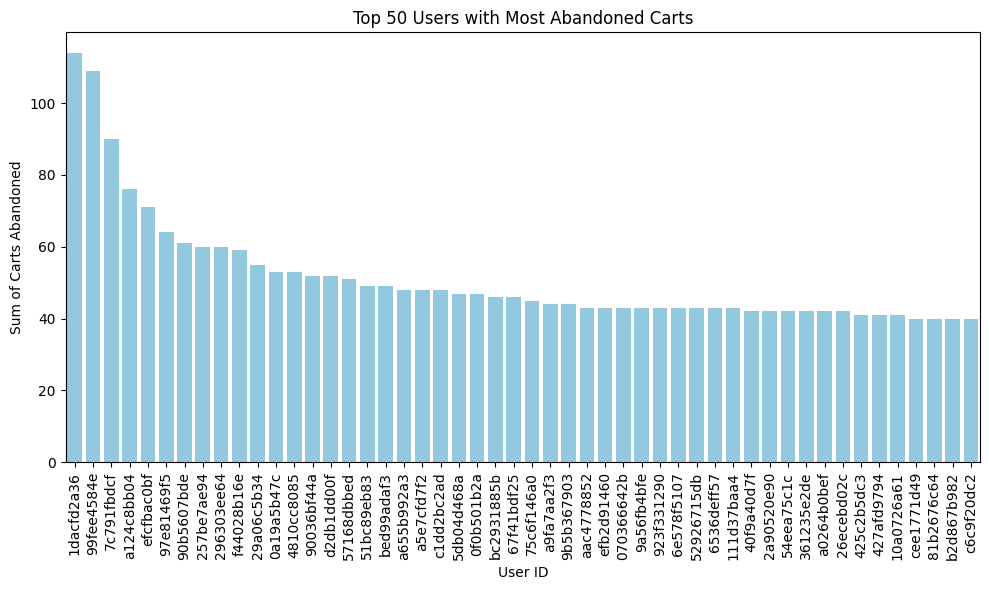

In [190]:
df_plot = df_clients[:50]
df_plot['user_id'] = df_plot['user_id'].astype(str).str.slice(0, 10)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='user_id', y='carts_abandoned_by_user', color='skyblue',order=df_plot['user_id'])
plt.xticks(rotation=90)
plt.title('Top 50 Users with Most Abandoned Carts')
plt.xlabel('User ID')
plt.ylabel('Sum of Carts Abandoned')
plt.tight_layout()
plt.show()

In [191]:
df_clients2 = df_clients.merge(users, on='user_id', how='left')
df_clients2 = df_clients2.sort_values(by='carts_abandoned_by_user', ascending=False)
df_clients2.head(20)

,user_id,carts_abandoned_by_user,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
0,1dacfd2a360677052d8605f843ae410dd23b0ddb7f506c...,114,Proposition,UKG,2021-08-06 09:23:27,2021-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,99fee4584e3a5c37b8dd94c76744c9b41beb36594561f2...,109,Proposition,UKH,2021-11-03 19:51:46,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2,7c791fbdcfdb4518615cc4b6fa3302f2f7cae7af60d839...,90,Proposition,UKK,2021-10-07 11:18:34,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3,a124c8bb0453ea0957405b7a08a7fd377247bac054a097...,76,Proposition,UKK,2021-12-08 19:53:09,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4,efcfbac0bf4c50dfa1cd933c705b7048351856c53880a0...,71,Proposition,UKH,2021-09-22 16:24:47,2021-09-01 00:00:00,4.0,2.0,2.0,0.0,0.0
5,97e81469f5758878f4d7eaa3af6b4fc37b2b5c22558811...,64,Proposition,UKK,2021-11-19 21:02:15,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
6,90b5607bde3acc164778ffe773e4bce1841889d979deaa...,61,Top Up,UKE,2020-11-16 11:14:05,2020-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
7,257be7ae940425880bbb20bf162c2616b32881bf0a8bda...,60,Top Up,UKI,2021-06-10 15:00:55,2021-06-01 00:00:00,4.0,2.0,2.0,0.0,0.0
8,296303ee64cb860f652a23631fce33e85e206a9be453d9...,60,Proposition,UKJ,2021-01-18 17:52:07,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
9,f44028b16eea34b1a5ccc5b722304f00096e4d7687d252...,59,Proposition,UKD,2020-07-18 10:03:30,2020-07-01 00:00:00,5.0,4.0,1.0,0.0,0.0


### 1.8 - Abandoned carts by user segment

In [192]:
df_by_user_segment = df_clients2.groupby('user_segment')['carts_abandoned_by_user'].sum().reset_index(name='carts_abandoned_by_user_segment').sort_values(by='carts_abandoned_by_user_segment', ascending=False)
df_by_user_segment

,user_segment,carts_abandoned_by_user_segment
0,Proposition,19878
1,Top Up,10991


In [193]:
df_by_user_segment['probability_distribution'] = (df_by_user_segment['carts_abandoned_by_user_segment'] / df_clients2['carts_abandoned_by_user'].sum()).round(2)

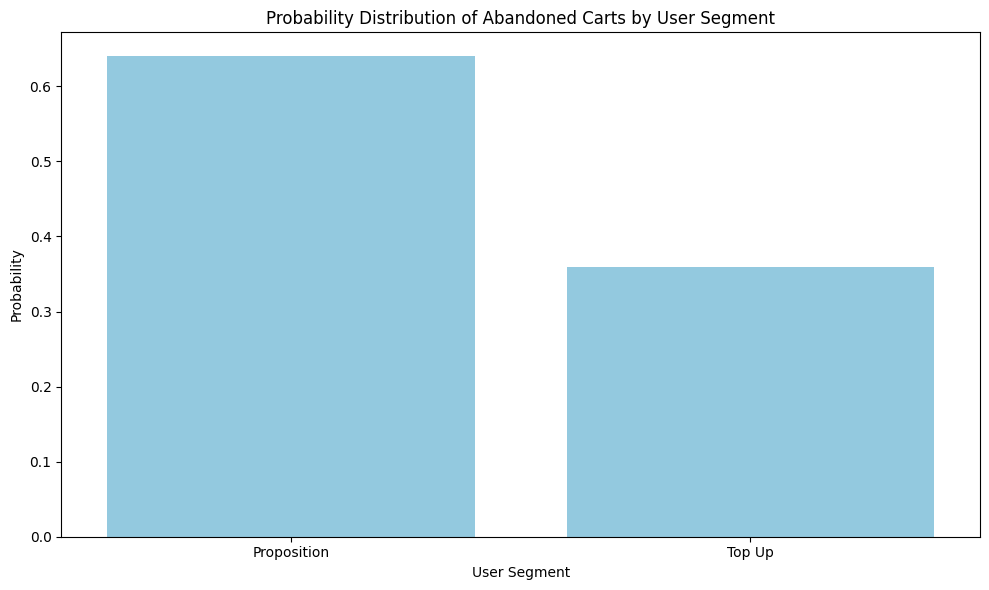

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_by_user_segment, x='user_segment', y='probability_distribution', color='skyblue')


plt.title('Probability Distribution of Abandoned Carts by User Segment')
plt.xlabel('User Segment')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()